# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

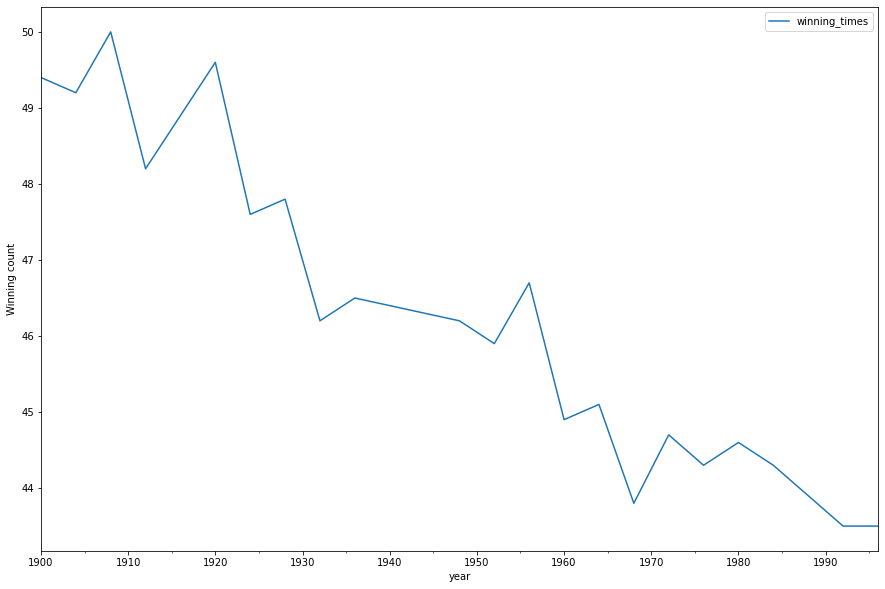

In [6]:
# Plot the time series
data.plot(figsize= (15, 10), ylabel= "Winning count", fontsize= 10);

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [8]:
# Difference the time series
data_diff = data.diff()
data_diff.dropna(inplace= True)
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

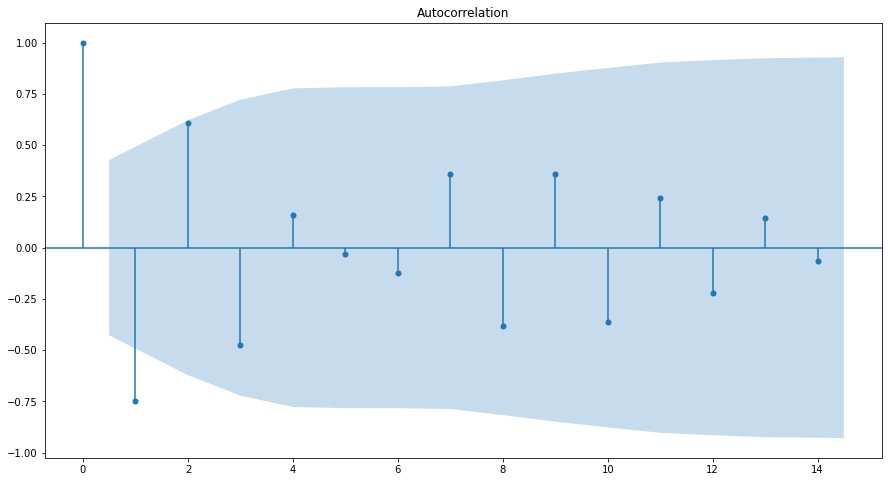

In [11]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(figsize= (15, 8))
plot_acf(data_diff, ax= ax);

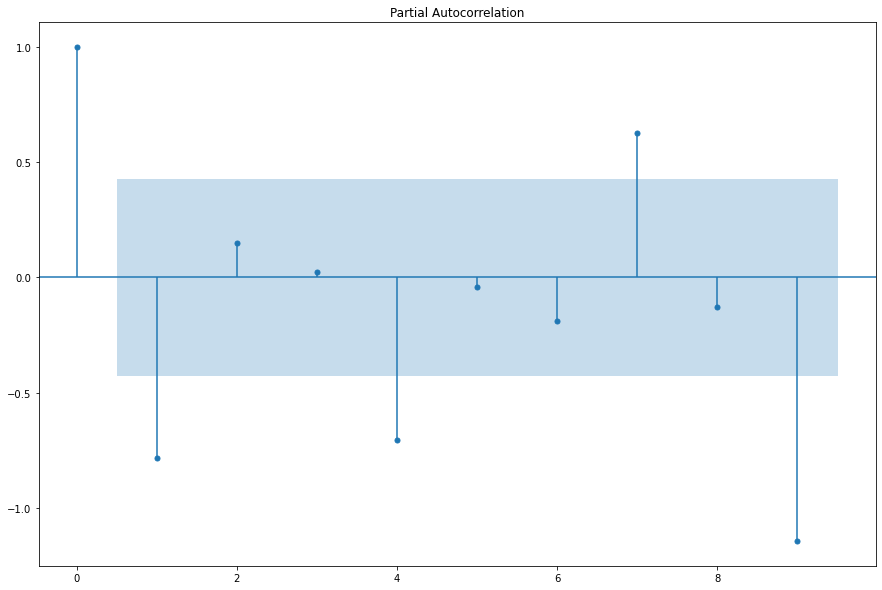

In [15]:
# Plot the PACF
fig, ax = plt.subplots(figsize= (15, 10))
plot_pacf(data_diff, ax= ax, lags= 9);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [18]:
# import ARMA
from statsmodels.tsa.arima_model import ARMA

In [36]:
# Fit an ARMA(1,0) model
model_1 = ARMA(data_diff, order=(1,0,0))
model_1_fit = model_1.fit()

# Print out summary information on the fit
print(model_1_fit.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Sat, 27 Aug 2022   AIC                             46.107
Time:                        17:27:21   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

In [37]:
model_1_fit.params

const                 -0.288457
ar.L1.winning_times   -0.718619
dtype: float64

In [38]:
# Fit an ARMA(2,0) model
model_2 = ARMA(data_diff, order=(2,0, 1))
model_2_fit = model_2.fit()

# Print out summary information on the fit
print(model_2_fit.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 0)   Log Likelihood                 -19.931
Method:                       css-mle   S.D. of innovations              0.614
Date:                Sat, 27 Aug 2022   AIC                             47.863
Time:                        17:27:29   BIC                             52.041
Sample:                    12-31-1904   HQIC                            48.770
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2835      0.090     -3.143      0.002      -0.460      -0.107
ar.L1.winning_times    -0.6307      0.223     -2.827      0.005      -1.068      -0.193
ar.L2.winning_ti

In [39]:
model_2_fit.params

const                 -0.283475
ar.L1.winning_times   -0.630698
ar.L2.winning_times    0.113247
dtype: float64

In [40]:
# Fit an ARMA(3,0) model
model_3 = ARMA(data_diff, order=(3,0,1))
model_3_fit = model_3.fit()

# Print out summary information on the fit
print(model_3_fit.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(3, 0)   Log Likelihood                 -19.925
Method:                       css-mle   S.D. of innovations              0.614
Date:                Sat, 27 Aug 2022   AIC                             49.851
Time:                        17:27:32   BIC                             55.073
Sample:                    12-31-1904   HQIC                            50.984
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2832      0.092     -3.076      0.002      -0.464      -0.103
ar.L1.winning_times    -0.6361      0.228     -2.792      0.005      -1.083      -0.190
ar.L2.winning_ti

In [41]:
model_3_fit.params

const                 -0.283201
ar.L1.winning_times   -0.636094
ar.L2.winning_times    0.128241
ar.L3.winning_times    0.026046
dtype: float64

## What is your final model? Why did you pick this model?

In [42]:
# Your comments here
"""
Based on the BIC scores of the models, model 1 is the better model.
Model 1 has a lower BIC score compared with the other 2 models.
"""

'\nBased on the BIC scores of the models, model 1 is the better model.\nModel 1 has a lower BIC score compared with the other 2 models.\n'

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 